In [1]:
## Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading the data

data = pd.read_csv("LoanData.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
## Creating a checkpoint and dropping the Loan_ID column

Loan_Data = data.copy()
Loan_Data = Loan_Data.drop(['Loan_ID'], axis=1)
Loan_Data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Cleaning

In [4]:
## Checking for NULL values
Loan_Data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
## Imputing Categorical Columns with their Mode Values

Loan_Data['Gender'] = Loan_Data['Gender'].fillna(Loan_Data['Gender'].mode()[0])
Loan_Data['Married'] = Loan_Data['Married'].fillna(Loan_Data['Married'].mode()[0])
Loan_Data['Dependents'] = Loan_Data['Dependents'].fillna(Loan_Data['Dependents'].mode()[0])
Loan_Data['Self_Employed'] = Loan_Data['Self_Employed'].fillna(Loan_Data['Self_Employed'].mode()[0])

## Imputing Numerical Columns with their Median Values

Loan_Data['LoanAmount'] = Loan_Data['LoanAmount'].fillna(Loan_Data['LoanAmount'].median())
Loan_Data['Loan_Amount_Term'] = Loan_Data['Loan_Amount_Term'].fillna(Loan_Data['Loan_Amount_Term'].median())
Loan_Data['Credit_History'] = Loan_Data['Credit_History'].fillna(Loan_Data['Credit_History'].median())

## To check if any NULL value is left
Loan_Data.isnull().sum().sum()

0

In [6]:
Loan_Data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


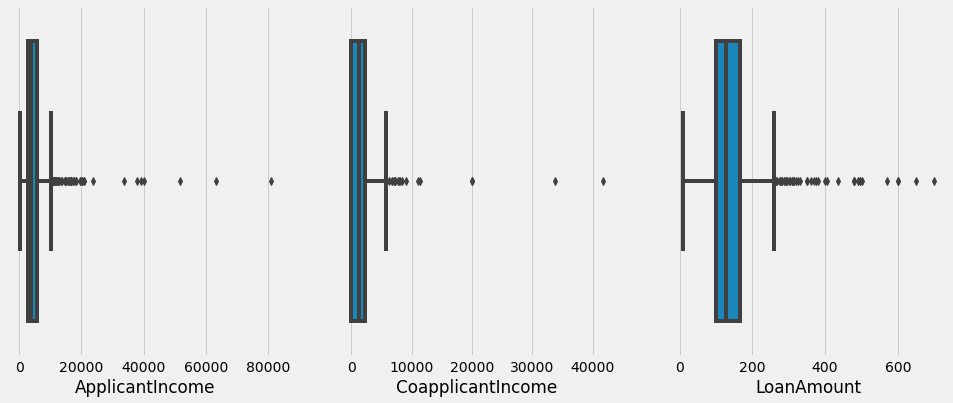

In [7]:
## Checking for OUTLIERS in the numerical columns

plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (15,6)

plt.subplot(1,3,1)
sns.boxplot(Loan_Data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(Loan_Data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(Loan_Data['LoanAmount'])

In [8]:
## Dealing with the outliers.

# Assigning customers with income >20000 , with an income =20000  
Loan_Data['ApplicantIncome'][Loan_Data['ApplicantIncome'] > 20000] = 20000

# Removing customers with Coapplicant Income > 10000
Loan_Data = Loan_Data[Loan_Data['CoapplicantIncome'] < 10000]

# Assigning customers asking for loan amount > 400, the loan amount = 400
Loan_Data['LoanAmount'][Loan_Data['LoanAmount'] > 400] = 400

<ipython-input-8-151202d0771f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan_Data['ApplicantIncome'][Loan_Data['ApplicantIncome'] > 20000] = 20000


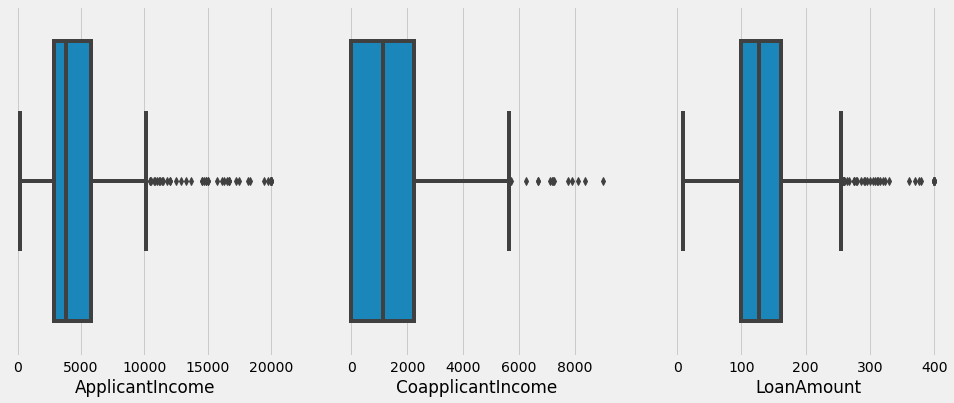

In [9]:
## Re-visualizing the numerical columns

plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (15,6)

plt.subplot(1,3,1)
sns.boxplot(Loan_Data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(Loan_Data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(Loan_Data['LoanAmount'])

In [10]:
Loan_Data.shape

(608, 12)

### Univariate Analysis

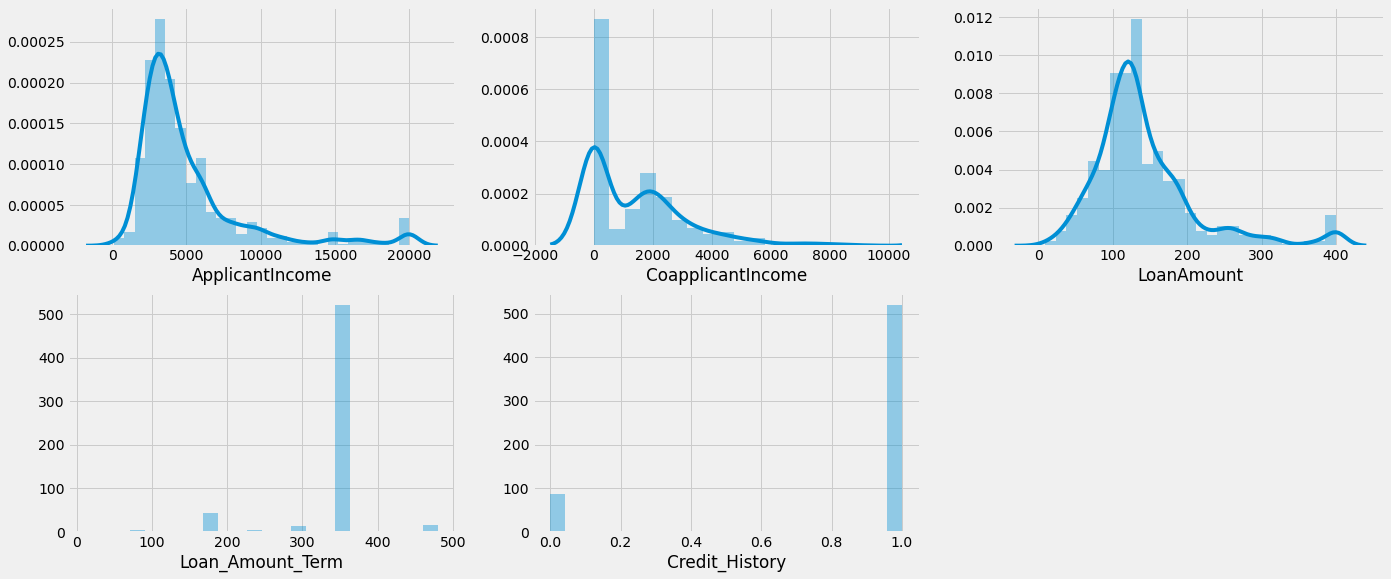

In [11]:
## for numerical columns
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (21,9)

plt.subplot(2,3,1)
sns.distplot(Loan_Data['ApplicantIncome'])

plt.subplot(2,3,2)
sns.distplot(Loan_Data['CoapplicantIncome'])

plt.subplot(2,3,3)
sns.distplot(Loan_Data['LoanAmount'])

plt.subplot(2,3,4)
sns.distplot(Loan_Data['Loan_Amount_Term'], kde=False)

plt.subplot(2,3,5)
sns.distplot(Loan_Data['Credit_History'], kde=False)

In [12]:
for i in Loan_Data['ApplicantIncome']:
    if i == 0:
        print("0 is present in Applicant Income Column")
        break
        
print("\n")

for i in Loan_Data['CoapplicantIncome']:
    if i == 0:
        print("O is present in Coapplicant Income column")
        break
   



O is present in Coapplicant Income column


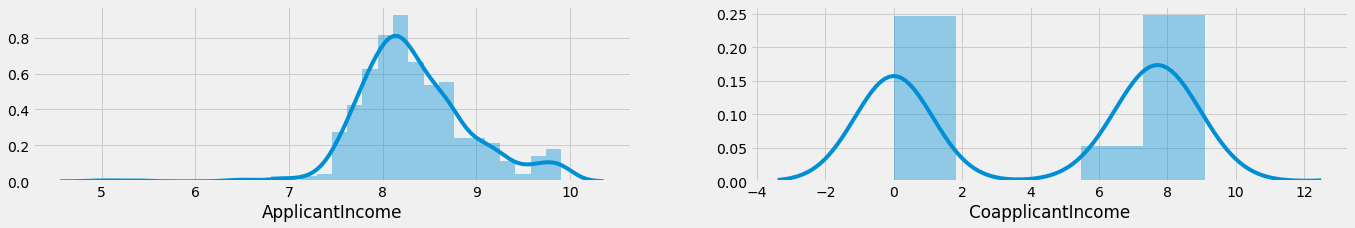

In [13]:
## doing Log Transformation to remove skewness of Applicant Income and Coapplicant Income 

Loan_Data['ApplicantIncome'] = np.log(Loan_Data['ApplicantIncome'])
Loan_Data['CoapplicantIncome'] = np.log1p(Loan_Data['CoapplicantIncome']) ## CoapplicantIncome column has 0 values. So log(1+x) tranformation is done.

## Re-visualizing the above columns

plt.rcParams["figure.figsize"] = (21,3)

plt.subplot(1,2,1)
sns.distplot(Loan_Data['ApplicantIncome'])

plt.subplot(1,2,2)
sns.distplot(Loan_Data['CoapplicantIncome'])

In [14]:
Loan_Data.describe(include="object")

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,608,608,608,608,608,608,608
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,497,398,358,474,527,230,421


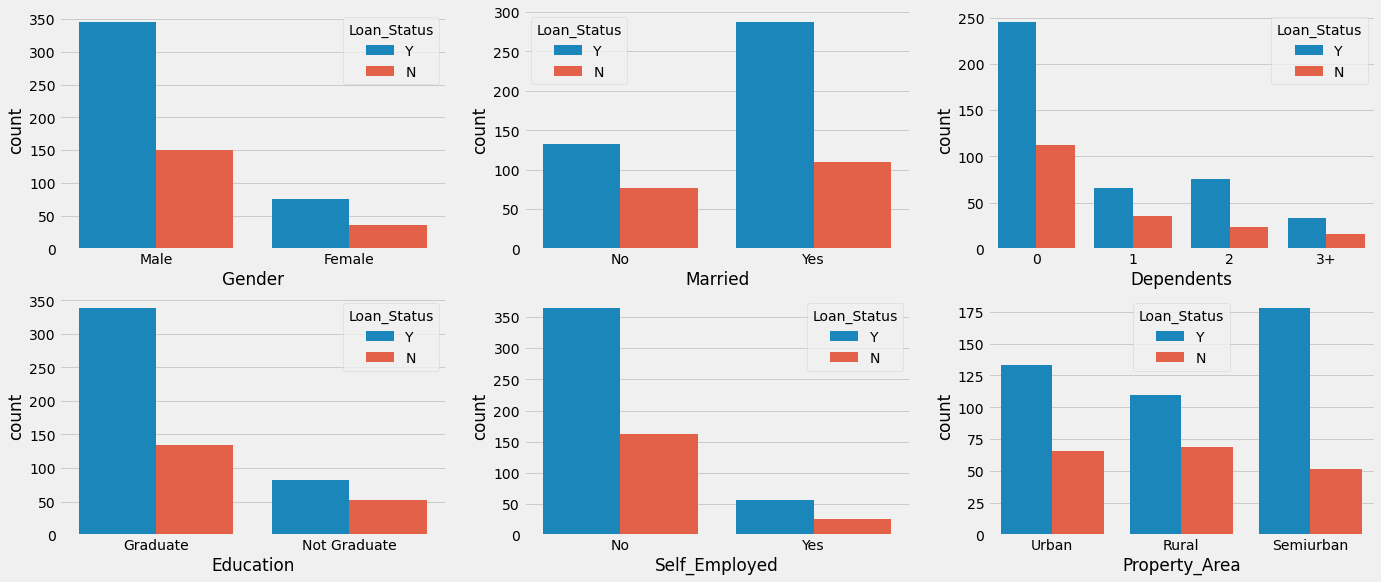

In [15]:
## Univariate Analysis for Categorical Features

plt.rcParams["figure.figsize"] = (21,9)

plt.subplot(2,3,1)
sns.countplot(Loan_Data['Gender'], hue=Loan_Data['Loan_Status'])

plt.subplot(2,3,2)
sns.countplot(Loan_Data['Married'], hue=Loan_Data['Loan_Status'])

plt.subplot(2,3,3)
sns.countplot(Loan_Data['Dependents'], hue=Loan_Data['Loan_Status'])

plt.subplot(2,3,4)
sns.countplot(Loan_Data['Education'], hue=Loan_Data['Loan_Status'])

plt.subplot(2,3,5)
sns.countplot(Loan_Data['Self_Employed'], hue=Loan_Data['Loan_Status'])

plt.subplot(2,3,6)
sns.countplot(Loan_Data['Property_Area'], hue=Loan_Data['Loan_Status'])

### Encoding the categorical columns

In [16]:
## finding the value_counts for all the categorical features

print(Loan_Data['Gender'].unique())
print(Loan_Data['Married'].unique())
print(Loan_Data['Dependents'].unique())
print(Loan_Data['Education'].unique())
print(Loan_Data['Self_Employed'].unique())
print(Loan_Data['Property_Area'].unique())
print(Loan_Data['Loan_Status'].unique())

['Male' 'Female']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


In [17]:
## Encoding the categorical features using "replace" function

Loan_Data['Gender'] = Loan_Data['Gender'].replace(("Male","Female"),(1,0))
Loan_Data['Married'] = Loan_Data['Married'].replace(("Yes","No"),(1,0))
Loan_Data['Dependents'] = Loan_Data['Dependents'].replace(("0","1","2","3+"),(0,1,1,1)) # Effects of 1 or 2 or 3+ dependents are all similar 
Loan_Data['Education'] = Loan_Data['Education'].replace(("Graduate","Not Graduate"),(1,0))
Loan_Data['Self_Employed'] = Loan_Data['Self_Employed'].replace(("Yes","No"),(1,0))
Loan_Data['Property_Area'] = Loan_Data['Property_Area'].replace(("Urban","Semiurban","Rural"),(1,1,0))
Loan_Data['Loan_Status'] = Loan_Data['Loan_Status'].replace(("Y","N"),(1,0))

Loan_Data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


### Checking Correlation

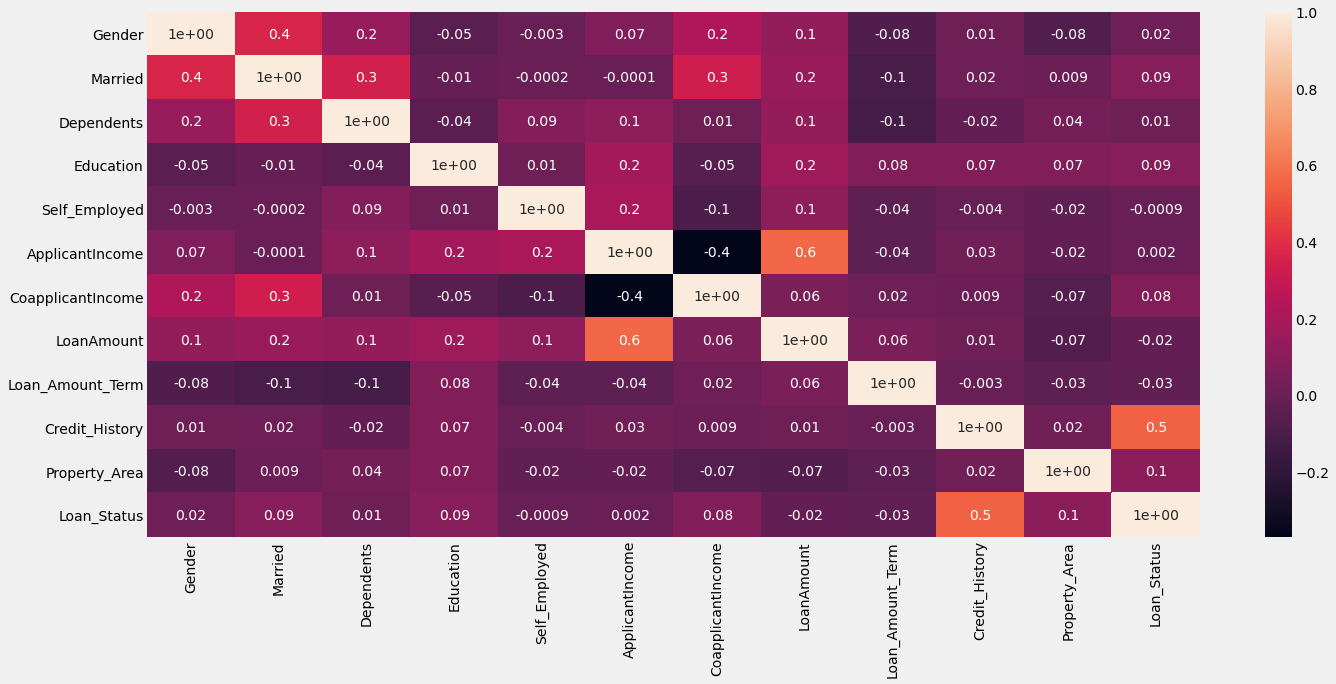

In [18]:
## heatmap

sns.heatmap(Loan_Data.corr(), annot=True, fmt="0.1")

### Checking Imbalance

In [19]:
print(Loan_Data['Loan_Status'].value_counts())
print(Loan_Data['Loan_Status'].value_counts()/Loan_Data.shape[0])

1    421
0    187
Name: Loan_Status, dtype: int64
1    0.692434
0    0.307566
Name: Loan_Status, dtype: float64


In [20]:
## Target Column is Imbalanced in 70:30. It needs to be balanced through imblearn libraray.

### Resampling the Loan_Data to balance it. 

In [21]:
y = Loan_Data['Loan_Status']
x = Loan_Data.drop(['Loan_Status'], axis = 1) 

In [22]:
print(x.shape)
print(y.shape)

(608, 11)
(608,)


In [23]:
## import imblearn

In [24]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE() 
x_resampled, y_resampled = sm.fit_sample(x, y.values.ravel())

In [25]:
print(x_resampled.shape)
print(y_resampled.shape)

(842, 11)
(842,)


In [26]:
y_resampled = pd.DataFrame(y_resampled)
y_resampled.head()

,0
0,1
1,0
2,1
3,1
4,1


In [27]:
y_resampled[0].value_counts()

1    421
0    421
Name: 0, dtype: int64

In [28]:
## Now the imbalance is rectified.

### Splitting the dataset for training the model

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", x_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (673, 11)
Shape of the y Train : (673, 1)
Shape of the x Test : (169, 11)
Shape of the y Test : (169, 1)


### Training the model : Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model_logistic = LogisticRegression()
model_logistic.fit(x_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_logistic_predicted = model_logistic.predict(x_test)

print("Training Accuracy : ", model_logistic.score(x_train, y_train) )
print("Test Accuracy : ", model_logistic.score(x_test, y_test) )

Training Accuracy :  0.7800891530460624
Test Accuracy :  0.757396449704142


In [38]:
## Checking performance report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_logistic_predicted, y_test)
cr = classification_report(y_logistic_predicted, y_test)
print("confusion_matrix : \n")
print(cm)
print("\n")
print("classification_report : \n")
print(cr)

confusion_matrix : 

[[49  3]
 [38 79]]


classification_report : 

              precision    recall  f1-score   support

           0       0.56      0.94      0.71        52
           1       0.96      0.68      0.79       117

    accuracy                           0.76       169
   macro avg       0.76      0.81      0.75       169
weighted avg       0.84      0.76      0.77       169



### Training the model : XGBoost

In [42]:
from xgboost import XGBClassifier

In [43]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[12:41:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
y_xgb_predicted = model_xgb.predict(x_test)

print("Training Accuracy : ", model_xgb.score(x_train, y_train) )
print("Test Accuracy : ", model_xgb.score(x_test, y_test) )

Training Accuracy :  1.0
Test Accuracy :  0.8165680473372781


In [45]:
cm_xgb = confusion_matrix(y_xgb_predicted, y_test)
cr_xgb = classification_report(y_xgb_predicted, y_test)

print("confusion_matrix for XGBoost model: \n")
print(cm_xgb)
print("\n")
print("classification_report for XGBoost model : \n")
print(cr_xgb)

confusion_matrix for XGBoost model: 

[[65  9]
 [22 73]]


classification_report for XGBoost model : 

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        74
           1       0.89      0.77      0.82        95

    accuracy                           0.82       169
   macro avg       0.82      0.82      0.82       169
weighted avg       0.83      0.82      0.82       169



In [46]:
## checking Cross validation score

from sklearn.model_selection import cross_val_score

clf_xgb = XGBClassifier(random_state = 0)
scores_xgb = cross_val_score(clf_xgb, x_train, y_train, cv=10)
print(scores_xgb)

C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[12:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Training the model : RandomForest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model_RFC = RandomForestClassifier()
model_RFC.fit(x_train,y_train)

<ipython-input-48-1875427e1eac>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFC.fit(x_train,y_train)


RandomForestClassifier()

In [49]:
y_RFC_predicted = model_RFC.predict(x_test)

print("Training Accuracy : ", model_RFC.score(x_train, y_train) )
print("Test Accuracy : ", model_RFC.score(x_test, y_test) )

Training Accuracy :  1.0
Test Accuracy :  0.8106508875739645


In [50]:
cm_RFC = confusion_matrix(y_RFC_predicted, y_test)
cr_RFC = classification_report(y_RFC_predicted, y_test)

print("confusion_matrix for RandomForest classifier model: \n")
print(cm_RFC)
print("\n")
print("classification_report for RandomForest classifer model : \n")
print(cr_RFC)

confusion_matrix for RandomForest classifier model: 

[[63  8]
 [24 74]]


classification_report for RandomForest classifer model : 

              precision    recall  f1-score   support

           0       0.72      0.89      0.80        71
           1       0.90      0.76      0.82        98

    accuracy                           0.81       169
   macro avg       0.81      0.82      0.81       169
weighted avg       0.83      0.81      0.81       169



In [51]:
## checking Cross validation score

from sklearn.model_selection import cross_val_score

clf_RFC = RandomForestClassifier(random_state = 0)
scores_RFC = cross_val_score(clf_RFC, x_train, y_train, cv=10)
print(scores_RFC)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pa

[0.77941176 0.76470588 0.80882353 0.88059701 0.85074627 0.74626866
 0.85074627 0.73134328 0.86567164 0.8358209 ]


## Loan Availability Status prediction is done with greater accuracy with XGBoost and RandomForest Classifer